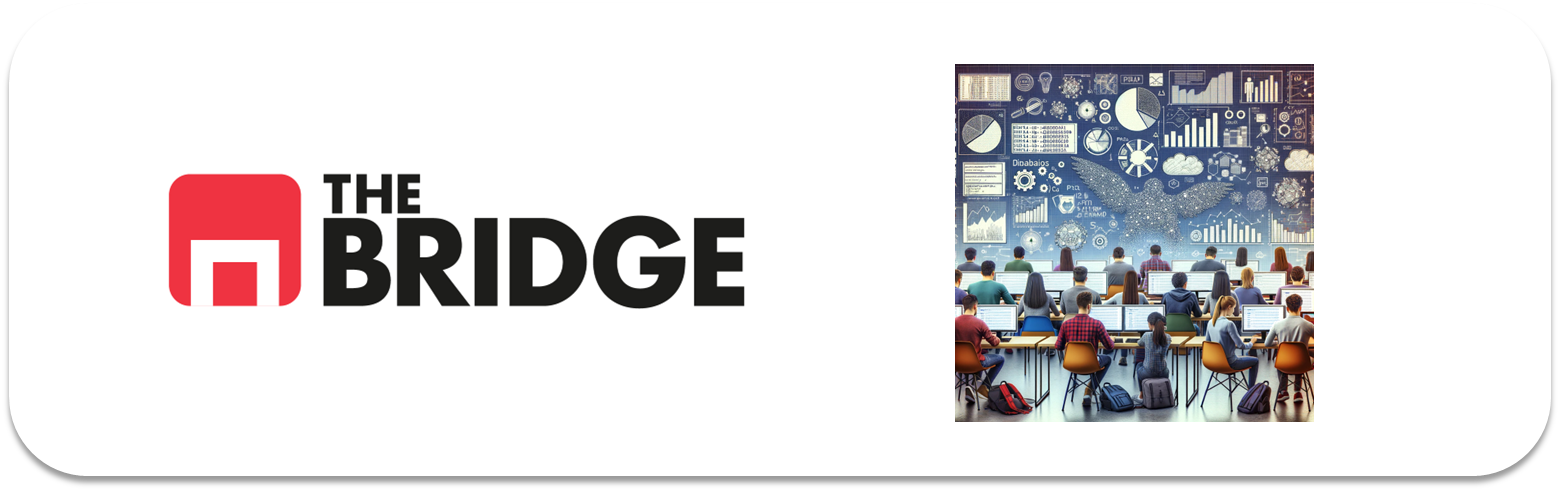

## PRACTICA OBLIGATORIA: **Regresion Lineal y Regularización**

* La práctica obligatoria de esta unidad consiste en hacer un modelado completo de un problema que ya conoces, la predicción de casas, pero con otro dataset. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Modelo de Regresión Lineal

El objetivo del modelo que tienes que construir es predecir la mediana del precio de las casas en una zona del área metropolitana de Boston dadas las características de las mismas. Sí, es parecido pero no igual a lo que hemos venido haciendo.

Aquí tienes una descripción de las variables del dataset, del que tendrás que decidir el target:  

***CRIM:*** Tasa de criminalidad per cápita por ciudad  
***ZN:*** Proporción de terreno residencial destinado a lotes de más de 25,000 pies cuadrados  
***INDUS:*** Proporción de acres de negocios no minoristas por ciudad  
***CHAS:*** Variable ficticia del río Charles (= 1 si el sector limita con el río; 0 en caso contrario)  
***NOX:*** Concentración de óxidos de nitrógeno (partes por 10 millones)  
***RM:*** Número promedio de habitaciones por vivienda  
***AGE:*** Proporción de unidades ocupadas por el propietario construidas antes de 1940  
***DIS:*** Distancias ponderadas a cinco centros de empleo de Boston  
***RAD:*** Índice de accesibilidad a autopistas radiales  
***TAX:*** Tasa de impuesto sobre la propiedad de valor total por $10,000  
***PTRATIO:*** Relación alumno-maestro por ciudad  
***LSTAT:*** % de población de estatus socioeconómico bajo  
***MEDV:*** Valor medio de las viviendas ocupadas por sus propietarios en miles de dólares  

### Indicaciones

A continuación tienes las indicaciones para hacer el modelado. No necesariamente tienes que seguirlos al pie de la letra, porque a partir de ahora ya las práctica obligatorias dejarán de ser mayormente guiadas por ejercicios y serán más de libre desarrollo, aunque con objetivos específicos, claros y determinados. 

En concreto se pide hacer un modelo de regresión lineal, evaluarlo contra un dataset de test reservado del original mostrando MAE,RMSE,MSE y $R2$, comparar las predicciones con los valores reales y realizar al menos un tipo de regularización de las conocidas, testando por lo menos 3 valores diferentes de hiperparámetros.

Los pasos para guiar el trabajo:
1. Carga el dataset. Está limpio y no necesitarás completar nulos, ni repasar los valores de las columnas.
2. Escoge y analiza la variable target de forma gráfica para ver la idoneidad de hacer un modelo de regresión.
3. Haz el split en train y test que creas conveniente y de la forma que creas conveniente.
4. Construye las parejas X,y de train y test
5. Haz un mini-EDA, selecciona las features que quieres quedarte y por qué.
6. Trata las variables para que funcionen lo mejor posible en el modelo.
7. Construye un modelo de regresión lineal.
8. Analiza si lo crees conveniente los pesos y la importancia de las features.
8. Evalúa tu modelo. Haz un pequeño assesmente de su generabilidad. Compara gráficamente las predicciones con los valores reales.
9. Regulariza al menos con un modelo alternativo y juega con 3 posibles valores de los hiperparámetros del modelo de regularización.
10. Expresa tus conclusiones, en concreto ¿con qué modelo te quedarías?¿por qué?



In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

df = pd.read_csv("./data/hard_to_find/obligatoria_hard.csv",sep = "|")

In [22]:
df


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,9.67,22.4
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,5.64,23.9
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,6.48,22.0


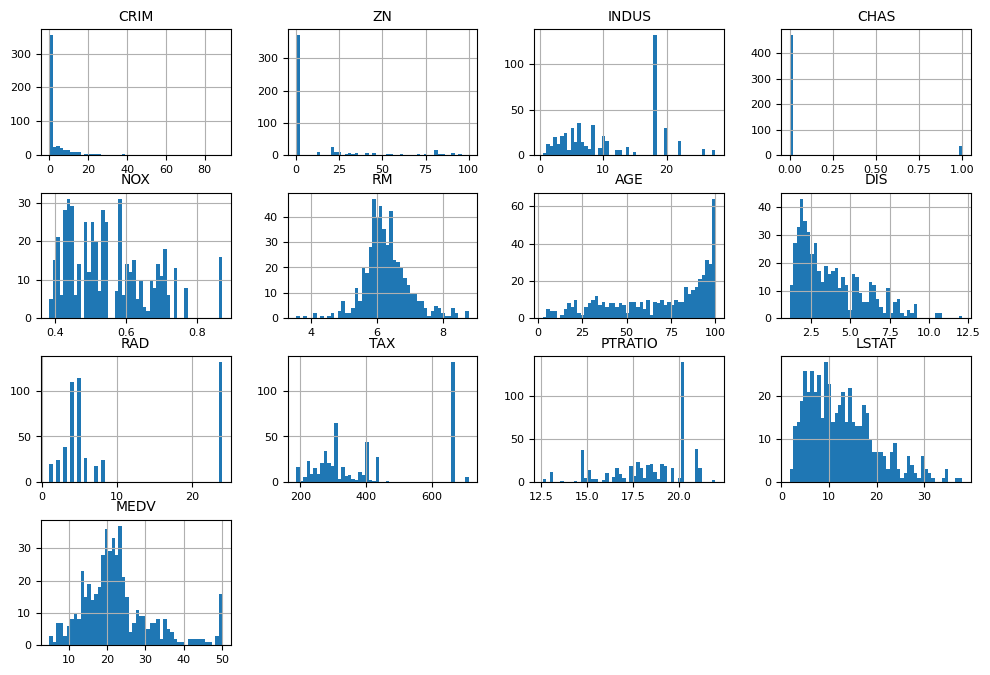

In [20]:
# Código extra para los tamaños de las fuentes y los "ticks" de los ejes, esto no lo vimos al hablar de matplotlib así que una extra
plt.rc('font', size=14)
plt.rc('axes', labelsize=10, titlesize=10)
plt.rc('legend', fontsize=8)
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

df.hist(bins=50, figsize=(12, 8)) # La forma de generar histogramas de una sola vez para las variables numéricas de un dataset
plt.show()

In [30]:
target = "MEDV"

In [24]:
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [25]:
len(train_set)

404

In [26]:
len(test_set)

102

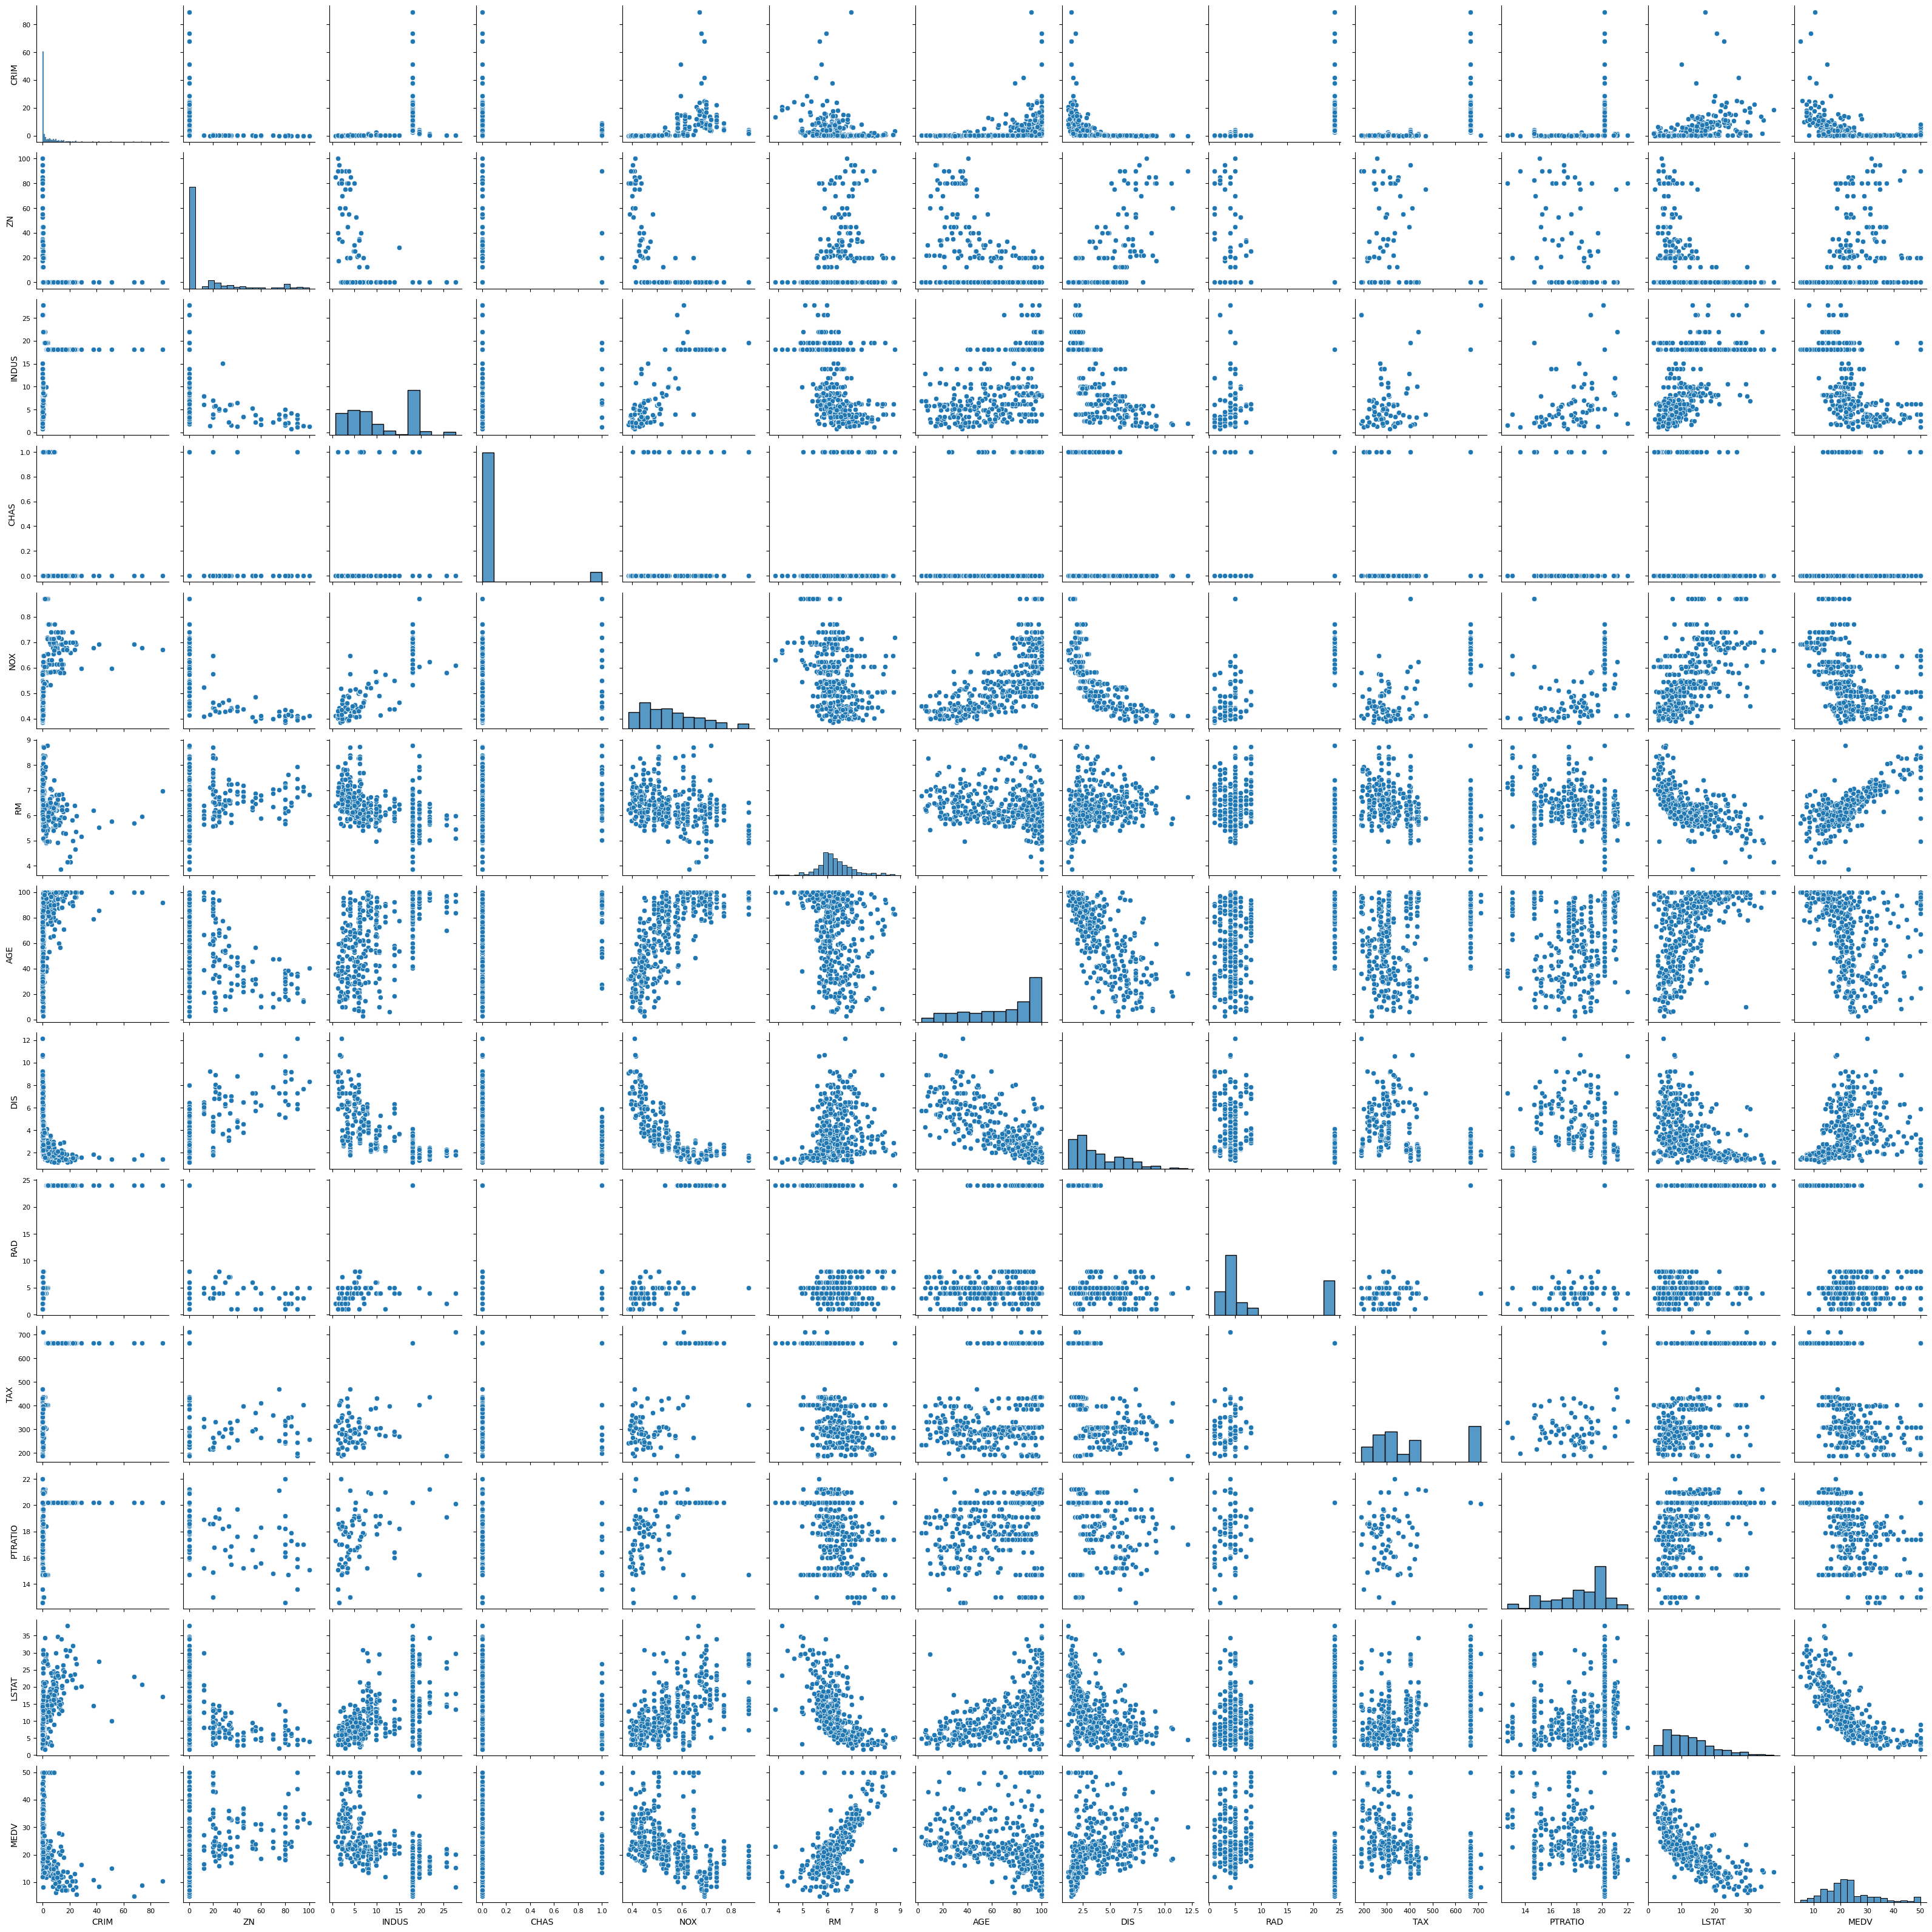

In [27]:
sns.pairplot(train_set)

In [31]:
corr = train_set.corr(numeric_only= True)
np.abs(corr[target].sort_values(ascending = False))

MEDV       1.000000
RM         0.710680
ZN         0.309504
DIS        0.235114
CHAS       0.190642
AGE        0.340216
CRIM       0.380091
RAD        0.387467
NOX        0.415768
TAX        0.459795
INDUS      0.470546
PTRATIO    0.491210
LSTAT      0.736422
Name: MEDV, dtype: float64

In [32]:
features_num = corr[target].index.to_list()
features_num.remove(target)
features_num

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'LSTAT']

In [35]:
# Separación x e y
X_train = train_set.drop(columns= [target])
y_train = train_set[target]

X_test = test_set.drop(columns = [target])
y_test = test_set[target]

scaler = StandardScaler()

X_train = pd.DataFrame(scaler.fit_transform(X_train[features_num]), columns= features_num)
X_test = pd.DataFrame(scaler.transform(X_test[features_num]), columns= features_num)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)




LinearRegression()

A priori parece que me quedo con **LSTAT** (estado económico de las personas del entorno), **RM** (número de habitaciones), y **PTRATIO** (relación alumno-maestro de la ciudad).


In [36]:
y_pred = lin_reg.predict(X_train)

argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_train, y_train))

MSE: 22.60428647941742
RMSE: 4.754396542087904
MAE: 3.424468775949534
MAPE: 0.17279637005769305
R2: 0.739801993681731


In [39]:
y_pred = lin_reg.predict(X_test)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lin_reg.score(X_test, y_test))

MSE: 22.777708563866035
RMSE: 4.772599769922682
MAE: 3.111377388238187
MAPE: 0.16264480537846737
R2: 0.689396788461476


In [37]:
ridge_reg = Ridge(alpha= 10)

ridge_reg.fit(X_train,y_train)

Ridge(alpha=10)

In [38]:
y_pred = ridge_reg.predict(X_train)

argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', ridge_reg.score(X_train, y_train))

MSE: 22.694169686958574
RMSE: 4.763839804921926
MAE: 3.39982174128184
MAPE: 0.1711696428848272
R2: 0.7387673478226372


In [40]:
y_pred = ridge_reg.predict(X_test)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', ridge_reg.score(X_test, y_test))

MSE: 23.092579748945866
RMSE: 4.805473935934505
MAE: 3.085876006181848
MAPE: 0.16069472854749797
R2: 0.6851031168205155


In [41]:
lasso_reg = Lasso(alpha= 125)

lasso_reg.fit(X_train,y_train)

Lasso(alpha=125)

In [42]:
y_pred = lasso_reg.predict(X_train)

argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lasso_reg.score(X_train, y_train))

MSE: 86.87340383295755
RMSE: 9.320590315691252
MAE: 6.809283403587883
MAPE: 0.36789089670140207
R2: 0.0


In [43]:
y_pred = lasso_reg.predict(X_test)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', lasso_reg.score(X_test, y_test))

MSE: 75.04543037399255
RMSE: 8.662876564628665
MAE: 6.255843525529023
MAPE: 0.37673311872350645
R2: -0.023340500652033302


In [44]:
elastic_reg = ElasticNet(alpha= 0.2, l1_ratio= 0.7)

elastic_reg.fit(X_train,y_train)

ElasticNet(alpha=0.2, l1_ratio=0.7)

In [45]:
y_pred = elastic_reg.predict(X_train)

argumentos = (y_train, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', elastic_reg.score(X_train, y_train))

MSE: 23.90834784357905
RMSE: 4.889616328872752
MAE: 3.4308613572619415
MAPE: 0.1719519957085676
R2: 0.7247909395889374


In [46]:
y_pred = elastic_reg.predict(X_test)

argumentos = (y_test, y_pred)

print('MSE:', metrics.mean_squared_error(*argumentos))
print('RMSE:', np.sqrt(metrics.mean_squared_error(*argumentos)))
print('MAE:', metrics.mean_absolute_error(*argumentos))
print('MAPE:', metrics.mean_absolute_percentage_error(*argumentos))
print('R2:', elastic_reg.score(X_test, y_test))

MSE: 25.373663111887357
RMSE: 5.0372277208686285
MAE: 3.188553473029184
MAPE: 0.16625784509833344
R2: 0.6539976253998074


### Resultados de Modelos de Regresión

#### Modelo sin Regularización:
**Conjunto de Entrenamiento:**
- MSE: 22.604
- RMSE: 4.754
- MAE: 3.424
- MAPE: 0.173
- R2: 0.740

**Conjunto de Prueba:**
- MSE: 22.778
- RMSE: 4.773
- MAE: 3.111
- MAPE: 0.163
- R2: 0.689

#### Modelo con Ridge (Alpha=1.0):
**Conjunto de Entrenamiento:**
- MSE: 22.694
- RMSE: 4.764
- MAE: 3.400
- MAPE: 0.171
- R2: 0.739

**Conjunto de Prueba:**
- MSE: 23.093
- RMSE: 4.805
- MAE: 3.086
- MAPE: 0.161
- R2: 0.685

#### Modelo con Lasso (Alpha=1.0):
**Conjunto de Entrenamiento:**
- MSE: 86.873
- RMSE: 9.321
- MAE: 6.809
- MAPE: 0.368
- R2: 0.0

**Conjunto de Prueba:**
- MSE: 75.045
- RMSE: 8.663
- MAE: 6.256
- MAPE: 0.377
- R2: -0.023

#### Modelo con ElasticNet (Alpha=1.0, L1_ratio=0.5):
**Conjunto de Entrenamiento:**
- MSE: 23.908
- RMSE: 4.890
- MAE: 3.431
- MAPE: 0.172
- R2: 0.725

**Conjunto de Prueba:**
- MSE: 25.374
- RMSE: 5.037
- MAE: 3.189
- MAPE: 0.166
- R2: 0.654

### Conclusiones:

- El modelo sin regularización muestra buen rendimiento tanto en entrenamiento como en prueba, con un R2 de 0.740 y 0.689, respectivamente.

- Ridge presenta resultados similares al modelo sin regularización.

- Lasso muestra un rendimiento inferior, indicando posible exclusión excesiva de características.

- ElasticNet tiene un rendimiento similar a Ridge, con una leve penalización adicional.

En conclusión, el modelo sin regularización o Ridge con `alpha=1.0` podrían ser preferibles, dependiendo de la importancia de mantener o eliminar características en el modelo. La elección final puede depender del contexto específico del problema.
